In [2]:
#imports
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import colors
import librosa

In [20]:
#load files
filenames = ['5E63D4B9', '5E63D47B', '5E63D5B1', '5E63D345', '5E63D43D', 
             '5E63D3FF', '5E63D307', '5E63D535', '5E63D3C1', '5E63D4F7', 
             '5E63D62D', '5E63D573', '5E63D383', '5E63D66B', '5E63D5EF']

audio = np.empty((len(filenames), 2880000))
annotations = []

# change the file structure if necessary
for i, filename in enumerate(filenames):
    audio[i] = librosa.load('data/audio/{}.WAV'.format(filename), 48000)[0]
    with open('data/annotations/{}.txt'.format(filename)) as f:
        a = []
        for line in f:
            a += [[int(x) for x in line.split()]]
        annotations += [a]

In [37]:
# add positive examples of birdsong to pos, background noise/other to neg
pos = []
neg = []
for faudio, fanno in zip(audio, annotations):
    start = 0
    for a in fanno:
        for i in range(a[0], a[1] - 500, 500):
            pos += [faudio[i * 48:i * 48 + 24000]]
        for i in range(start, a[0] - 500, 500):
            neg += [faudio[i * 48:i * 48 + 24000]]
        start = a[1]
    
pos = np.array(pos)
neg = np.array(neg)

In [41]:
# stack into feature array X and label array y
X = np.vstack([pos, neg])
y = np.hstack([np.ones(pos.shape[0], dtype=bool), np.zeros(neg.shape[0], dtype=bool)])

In [45]:
# compute MFCCs for each sample
n_mfcc = 13
X_mfcc = np.empty((X.shape[0], n_mfcc))
for i, x in enumerate(X):
    X_mfcc[i] = librosa.feature.mfcc(x, n_mfcc=n_mfcc).mean(axis=1)

<IPython.core.display.Javascript object>


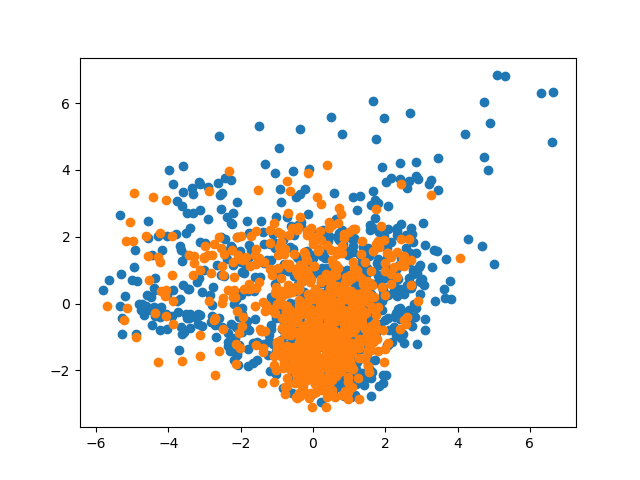

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_dr = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X_mfcc))

fig, ax = plt.subplots()
ax.scatter(X_dr[y == 0, 0], X_dr[y == 0, 1])
ax.scatter(X_dr[y == 1, 0], X_dr[y == 1, 1])

In [49]:
from sklearn.svm import SVC

svm = SVC().fit(StandardScaler().fit_transform(X_mfcc), y)
svm.score(StandardScaler().fit_transform(X_mfcc), y)

0.8297595841455491